# Lowpass and Highpass Bootstrapping

In [6]:
import numpy as np
import tensorflow as tf
import random

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os
# os.environ['TF_DETERMINISTIC_OPS'] = '1'


In [7]:
filenames = ["/home/jmanos/notebooks/Lowpass_data/Rhone_data_continuous_lowpass.h5", 
             "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"]

filt_type = ['Lowpass', 'Highpass']

history = {}
val_performance = {}
performance = {}

residuals = {}
true_discharge_vals = {}

seeds = np.arange(0,50,1)

for file, filt in zip(filenames, filt_type):
    
    for SEED in seeds:
    
        SEED = SEED
        random.seed(SEED)
        np.random.seed(SEED)
        tf.random.set_seed(SEED)

        print(file, filt)

        linear_model, lstm_model, dnn_model, df_all_chan, das_data_all, f = d2d.import_data(filename = file)

        da = df_all_chan.to_numpy()

        multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                        input_width=200,
                                                        label_width=1, 
                                                        shift=0,
                                                        label_columns=['Discharge'],
                                                        input_columns=list(np.arange(0,2308,1)),
                                                        shuffle=True,
                                                        batch_size=32)


        history['lstm_'+str(SEED)+'_'+filt] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)
        
        val_performance['lstm_'+str(SEED)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.val)
        performance['lstm_'+str(SEED)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)
        
        pred_on_test = lstm_model.predict(multi_step_window_shuffled.test).squeeze()
        pred_on_test = np.asarray(pred_on_test)
        #pred_on_test = pred_on_test[:,-1]
        predictions_test = (pred_on_test * multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean

        test_true_dis = []

        for i in multi_step_window_shuffled.test.as_numpy_iterator():
            test_true_dis.append(i[1])

        test_true_dis = (test_true_dis[0].squeeze() * multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean

        residuals['Run ' + str(SEED)+''+filt] = predictions_test - test_true_dis
        true_discharge_vals['Run ' + str(SEED)+''+filt] = test_true_dis

<ipython-input-7-917c11e56d69>:20: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


/home/jmanos/notebooks/Lowpass_data/Rhone_data_continuous_lowpass.h5 Lowpass
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Epoch 1/1000
7/7 [==============================] - 2s 205ms/step - loss: 0.9586 - mean_absolute_error: 0.8039 - val_loss: 0.6206 - val_mean_absolute_error: 0.5953
Epoch 2/1000
7/7 [==============================] - 1s 166ms/step - loss: 0.6251 - mean_absolute_error: 0.6065 - val_loss: 0.3842 - val_mean_absolute_error: 0.5238
Epoch 3/1000
7/7 [==============================] - 1s 152ms/step - loss: 0.3715 - mean_absolute_error: 0.4578 - val_loss: 0.4926 - val_mean_absolute_error: 0.5422
Epoch 4/1000
7/7 [==============================] - 1s 166ms/step - loss: 0.3343 - mean_absolute_error: 0.4343 - val_loss: 0.4127 - val_mean_absolute_error: 0.4913
Epoch 5/1000
7/7 [==============================] - 1s 164ms/step - loss: 0.2256 - mean_absolute_error: 0.3464 - val_loss: 0.2899 - val_mean_absolute_error: 0.4018
Epoch 6/1000
7/7 [========================

2/2 [==============================] - 0s 63ms/step - loss: 0.1255 - mean_absolute_error: 0.1610
/home/jmanos/notebooks/Lowpass_data/Rhone_data_continuous_lowpass.h5 Lowpass
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Epoch 1/1000
7/7 [==============================] - 3s 183ms/step - loss: 0.9801 - mean_absolute_error: 0.8018 - val_loss: 0.5221 - val_mean_absolute_error: 0.5670
Epoch 2/1000
7/7 [==============================] - 1s 151ms/step - loss: 0.5174 - mean_absolute_error: 0.5679 - val_loss: 0.4205 - val_mean_absolute_error: 0.4760
Epoch 3/1000
7/7 [==============================] - 1s 148ms/step - loss: 0.3261 - mean_absolute_error: 0.4371 - val_loss: 0.2624 - val_mean_absolute_error: 0.4018
Epoch 4/1000
7/7 [==============================] - 1s 153ms/step - loss: 0.2179 - mean_absolute_error: 0.3542 - val_loss: 0.2330 - val_mean_absolute_error: 0.3656
Epoch 5/1000
7/7 [==============================] - 1s 151ms/step - loss: 0.1628 - mean_absolute_error: 0.293

Epoch 4/1000
7/7 [==============================] - 1s 147ms/step - loss: 0.2844 - mean_absolute_error: 0.4026 - val_loss: 0.2493 - val_mean_absolute_error: 0.3818
Epoch 5/1000
7/7 [==============================] - 1s 148ms/step - loss: 0.2119 - mean_absolute_error: 0.3377 - val_loss: 0.2246 - val_mean_absolute_error: 0.3503
Epoch 6/1000
7/7 [==============================] - 1s 144ms/step - loss: 0.1736 - mean_absolute_error: 0.2983 - val_loss: 0.1957 - val_mean_absolute_error: 0.3081
Epoch 7/1000
7/7 [==============================] - 1s 156ms/step - loss: 0.1280 - mean_absolute_error: 0.2414 - val_loss: 0.1818 - val_mean_absolute_error: 0.2956
Epoch 8/1000
7/7 [==============================] - 1s 138ms/step - loss: 0.1183 - mean_absolute_error: 0.2326 - val_loss: 0.1553 - val_mean_absolute_error: 0.2361
Epoch 9/1000
7/7 [==============================] - 1s 141ms/step - loss: 0.0847 - mean_absolute_error: 0.1998 - val_loss: 0.1619 - val_mean_absolute_error: 0.2570
Epoch 10/1000
7/

Epoch 25/1000
7/7 [==============================] - 1s 168ms/step - loss: 0.0124 - mean_absolute_error: 0.0818 - val_loss: 0.1658 - val_mean_absolute_error: 0.2277
Epoch 26/1000
7/7 [==============================] - 1s 166ms/step - loss: 0.0077 - mean_absolute_error: 0.0594 - val_loss: 0.1407 - val_mean_absolute_error: 0.1987
Epoch 27/1000
7/7 [==============================] - 1s 164ms/step - loss: 0.0047 - mean_absolute_error: 0.0483 - val_loss: 0.1457 - val_mean_absolute_error: 0.2106
Epoch 28/1000
7/7 [==============================] - 1s 169ms/step - loss: 0.0047 - mean_absolute_error: 0.0467 - val_loss: 0.1461 - val_mean_absolute_error: 0.1950
Epoch 29/1000
7/7 [==============================] - 1s 164ms/step - loss: 0.0033 - mean_absolute_error: 0.0398 - val_loss: 0.1461 - val_mean_absolute_error: 0.1981
Epoch 30/1000
7/7 [==============================] - 1s 162ms/step - loss: 0.0023 - mean_absolute_error: 0.0331 - val_loss: 0.1462 - val_mean_absolute_error: 0.1961
Epoch 31/1

7/7 [==============================] - 1s 189ms/step - loss: 0.0044 - mean_absolute_error: 0.0458 - val_loss: 0.1631 - val_mean_absolute_error: 0.2058
Epoch 37/1000
7/7 [==============================] - 1s 196ms/step - loss: 0.0031 - mean_absolute_error: 0.0393 - val_loss: 0.1621 - val_mean_absolute_error: 0.2155
Epoch 38/1000
2/2 [==============================] - 0s 69ms/step - loss: 0.1630 - mean_absolute_error: 0.2020
/home/jmanos/notebooks/Lowpass_data/Rhone_data_continuous_lowpass.h5 Lowpass
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Epoch 1/1000
7/7 [==============================] - 3s 179ms/step - loss: 1.0685 - mean_absolute_error: 0.8431 - val_loss: 0.7167 - val_mean_absolute_error: 0.7341
Epoch 2/1000
7/7 [==============================] - 1s 144ms/step - loss: 0.5502 - mean_absolute_error: 0.6200 - val_loss: 0.4157 - val_mean_absolute_error: 0.5380
Epoch 3/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.3420 - mean_absolute_error: 0.4

Epoch 6/1000
7/7 [==============================] - 1s 149ms/step - loss: 0.1238 - mean_absolute_error: 0.2513 - val_loss: 0.1949 - val_mean_absolute_error: 0.3149
Epoch 7/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.0900 - mean_absolute_error: 0.2114 - val_loss: 0.1509 - val_mean_absolute_error: 0.2709
Epoch 8/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.0672 - mean_absolute_error: 0.1831 - val_loss: 0.1772 - val_mean_absolute_error: 0.2789
Epoch 9/1000
7/7 [==============================] - 1s 138ms/step - loss: 0.0496 - mean_absolute_error: 0.1517 - val_loss: 0.1942 - val_mean_absolute_error: 0.2689
Epoch 10/1000
7/7 [==============================] - 1s 146ms/step - loss: 0.0411 - mean_absolute_error: 0.1401 - val_loss: 0.1538 - val_mean_absolute_error: 0.2252
Epoch 11/1000
7/7 [==============================] - 1s 140ms/step - loss: 0.0316 - mean_absolute_error: 0.1181 - val_loss: 0.1978 - val_mean_absolute_error: 0.2659
Epoch 12/1000


Epoch 13/1000
7/7 [==============================] - 1s 140ms/step - loss: 0.0314 - mean_absolute_error: 0.1093 - val_loss: 0.0573 - val_mean_absolute_error: 0.1283
Epoch 14/1000
7/7 [==============================] - 1s 147ms/step - loss: 0.0236 - mean_absolute_error: 0.0964 - val_loss: 0.0558 - val_mean_absolute_error: 0.1209
Epoch 15/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.0202 - mean_absolute_error: 0.0874 - val_loss: 0.0541 - val_mean_absolute_error: 0.1186
Epoch 16/1000
7/7 [==============================] - 1s 140ms/step - loss: 0.0148 - mean_absolute_error: 0.0749 - val_loss: 0.0386 - val_mean_absolute_error: 0.1025
Epoch 17/1000
7/7 [==============================] - 1s 146ms/step - loss: 0.0100 - mean_absolute_error: 0.0622 - val_loss: 0.0381 - val_mean_absolute_error: 0.1027
Epoch 18/1000
7/7 [==============================] - 1s 143ms/step - loss: 0.0097 - mean_absolute_error: 0.0652 - val_loss: 0.0351 - val_mean_absolute_error: 0.0866
Epoch 19/1

2/2 [==============================] - 0s 63ms/step - loss: 0.0911 - mean_absolute_error: 0.1761
/home/jmanos/notebooks/Lowpass_data/Rhone_data_continuous_lowpass.h5 Lowpass
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Epoch 1/1000
7/7 [==============================] - 2s 180ms/step - loss: 0.9483 - mean_absolute_error: 0.7836 - val_loss: 0.3653 - val_mean_absolute_error: 0.5254
Epoch 2/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.4717 - mean_absolute_error: 0.5245 - val_loss: 0.2950 - val_mean_absolute_error: 0.4324
Epoch 3/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.3593 - mean_absolute_error: 0.4660 - val_loss: 0.2803 - val_mean_absolute_error: 0.4261
Epoch 4/1000
7/7 [==============================] - 1s 138ms/step - loss: 0.3156 - mean_absolute_error: 0.4212 - val_loss: 0.1641 - val_mean_absolute_error: 0.3283
Epoch 5/1000
7/7 [==============================] - 1s 140ms/step - loss: 0.2394 - mean_absolute_error: 0.359

Epoch 29/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.0113 - mean_absolute_error: 0.0779 - val_loss: 0.1074 - val_mean_absolute_error: 0.1533
Epoch 30/1000
7/7 [==============================] - 1s 141ms/step - loss: 0.0067 - mean_absolute_error: 0.0620 - val_loss: 0.0981 - val_mean_absolute_error: 0.1284
Epoch 31/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.0048 - mean_absolute_error: 0.0498 - val_loss: 0.0979 - val_mean_absolute_error: 0.1356
Epoch 32/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.0043 - mean_absolute_error: 0.0478 - val_loss: 0.0987 - val_mean_absolute_error: 0.1201
Epoch 33/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.0028 - mean_absolute_error: 0.0359 - val_loss: 0.1038 - val_mean_absolute_error: 0.1368
Epoch 34/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.0024 - mean_absolute_error: 0.0349 - val_loss: 0.0976 - val_mean_absolute_error: 0.1163
Epoch 35/1

Epoch 7/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.1004 - mean_absolute_error: 0.2130 - val_loss: 0.3496 - val_mean_absolute_error: 0.3700
Epoch 8/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.0812 - mean_absolute_error: 0.1948 - val_loss: 0.3129 - val_mean_absolute_error: 0.3337
Epoch 9/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0680 - mean_absolute_error: 0.1798 - val_loss: 0.3337 - val_mean_absolute_error: 0.3458
Epoch 10/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0704 - mean_absolute_error: 0.1897 - val_loss: 0.3320 - val_mean_absolute_error: 0.3235
Epoch 11/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0554 - mean_absolute_error: 0.1601 - val_loss: 0.3068 - val_mean_absolute_error: 0.3328
Epoch 12/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0545 - mean_absolute_error: 0.1627 - val_loss: 0.2853 - val_mean_absolute_error: 0.3008
Epoch 13/1000

2/2 [==============================] - 0s 60ms/step - loss: 0.2060 - mean_absolute_error: 0.2360
/home/jmanos/notebooks/Lowpass_data/Rhone_data_continuous_lowpass.h5 Lowpass
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Epoch 1/1000
7/7 [==============================] - 2s 176ms/step - loss: 1.3205 - mean_absolute_error: 0.9067 - val_loss: 0.5757 - val_mean_absolute_error: 0.5952
Epoch 2/1000
7/7 [==============================] - 1s 145ms/step - loss: 0.5033 - mean_absolute_error: 0.5618 - val_loss: 0.4455 - val_mean_absolute_error: 0.4965
Epoch 3/1000
7/7 [==============================] - 1s 140ms/step - loss: 0.3749 - mean_absolute_error: 0.4752 - val_loss: 0.3626 - val_mean_absolute_error: 0.4378
Epoch 4/1000
7/7 [==============================] - 1s 141ms/step - loss: 0.2645 - mean_absolute_error: 0.3944 - val_loss: 0.3116 - val_mean_absolute_error: 0.3966
Epoch 5/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.2103 - mean_absolute_error: 0.339

Epoch 17/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0160 - mean_absolute_error: 0.0858 - val_loss: 0.0900 - val_mean_absolute_error: 0.1898
Epoch 18/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0126 - mean_absolute_error: 0.0752 - val_loss: 0.1033 - val_mean_absolute_error: 0.2142
Epoch 19/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.0124 - mean_absolute_error: 0.0769 - val_loss: 0.1047 - val_mean_absolute_error: 0.2173
Epoch 20/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.0229 - mean_absolute_error: 0.1040 - val_loss: 0.0956 - val_mean_absolute_error: 0.2060
Epoch 21/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0154 - mean_absolute_error: 0.0877 - val_loss: 0.0920 - val_mean_absolute_error: 0.1884
Epoch 22/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0144 - mean_absolute_error: 0.0793 - val_loss: 0.1169 - val_mean_absolute_error: 0.2279
Epoch 23/1

Epoch 3/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.2843 - mean_absolute_error: 0.4120 - val_loss: 0.2869 - val_mean_absolute_error: 0.4057
Epoch 4/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.2069 - mean_absolute_error: 0.3349 - val_loss: 0.2777 - val_mean_absolute_error: 0.3935
Epoch 5/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.1751 - mean_absolute_error: 0.3095 - val_loss: 0.2727 - val_mean_absolute_error: 0.3835
Epoch 6/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.1460 - mean_absolute_error: 0.2784 - val_loss: 0.2460 - val_mean_absolute_error: 0.3418
Epoch 7/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.1100 - mean_absolute_error: 0.2406 - val_loss: 0.2401 - val_mean_absolute_error: 0.3169
Epoch 8/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0843 - mean_absolute_error: 0.2129 - val_loss: 0.2453 - val_mean_absolute_error: 0.2930
Epoch 9/1000
7/7

7/7 [==============================] - 1s 133ms/step - loss: 0.0326 - mean_absolute_error: 0.1202 - val_loss: 0.1253 - val_mean_absolute_error: 0.2270
Epoch 18/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.0303 - mean_absolute_error: 0.1105 - val_loss: 0.1191 - val_mean_absolute_error: 0.2058
Epoch 19/1000
7/7 [==============================] - 1s 137ms/step - loss: 0.0229 - mean_absolute_error: 0.0979 - val_loss: 0.1263 - val_mean_absolute_error: 0.2030
Epoch 20/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.0197 - mean_absolute_error: 0.0943 - val_loss: 0.1198 - val_mean_absolute_error: 0.1998
Epoch 21/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0231 - mean_absolute_error: 0.0971 - val_loss: 0.1750 - val_mean_absolute_error: 0.2376
Epoch 22/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0221 - mean_absolute_error: 0.0998 - val_loss: 0.1396 - val_mean_absolute_error: 0.2041
Epoch 23/1000
7/7 [=====

Epoch 12/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.0440 - mean_absolute_error: 0.1321 - val_loss: 0.2464 - val_mean_absolute_error: 0.2917
Epoch 13/1000
7/7 [==============================] - 1s 128ms/step - loss: 0.0355 - mean_absolute_error: 0.1190 - val_loss: 0.2373 - val_mean_absolute_error: 0.2862
Epoch 14/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0338 - mean_absolute_error: 0.1101 - val_loss: 0.2905 - val_mean_absolute_error: 0.3089
Epoch 15/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.0394 - mean_absolute_error: 0.1173 - val_loss: 0.2782 - val_mean_absolute_error: 0.3010
Epoch 16/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0389 - mean_absolute_error: 0.1208 - val_loss: 0.2588 - val_mean_absolute_error: 0.3067
Epoch 17/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0470 - mean_absolute_error: 0.1480 - val_loss: 0.2640 - val_mean_absolute_error: 0.3013
Epoch 18/1

7/7 [==============================] - 1s 136ms/step - loss: 0.0294 - mean_absolute_error: 0.1137 - val_loss: 0.2093 - val_mean_absolute_error: 0.2367
Epoch 12/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0362 - mean_absolute_error: 0.1126 - val_loss: 0.2034 - val_mean_absolute_error: 0.2262
Epoch 13/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.0278 - mean_absolute_error: 0.1066 - val_loss: 0.1747 - val_mean_absolute_error: 0.1992
Epoch 14/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0173 - mean_absolute_error: 0.0872 - val_loss: 0.1797 - val_mean_absolute_error: 0.1934
Epoch 15/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0131 - mean_absolute_error: 0.0769 - val_loss: 0.1782 - val_mean_absolute_error: 0.1794
Epoch 16/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0097 - mean_absolute_error: 0.0618 - val_loss: 0.1732 - val_mean_absolute_error: 0.1765
Epoch 17/1000
7/7 [=====

7/7 [==============================] - 1s 134ms/step - loss: 0.0083 - mean_absolute_error: 0.0574 - val_loss: 0.1632 - val_mean_absolute_error: 0.2136
Epoch 35/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0070 - mean_absolute_error: 0.0524 - val_loss: 0.1503 - val_mean_absolute_error: 0.1939
Epoch 36/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0049 - mean_absolute_error: 0.0414 - val_loss: 0.1475 - val_mean_absolute_error: 0.1944
Epoch 37/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.0058 - mean_absolute_error: 0.0468 - val_loss: 0.1544 - val_mean_absolute_error: 0.1927
Epoch 38/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0047 - mean_absolute_error: 0.0372 - val_loss: 0.1605 - val_mean_absolute_error: 0.2046
Epoch 39/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0048 - mean_absolute_error: 0.0408 - val_loss: 0.1527 - val_mean_absolute_error: 0.1908
Epoch 40/1000
7/7 [=====

Epoch 4/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.2013 - mean_absolute_error: 0.3309 - val_loss: 0.1827 - val_mean_absolute_error: 0.3161
Epoch 5/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.1510 - mean_absolute_error: 0.2858 - val_loss: 0.1537 - val_mean_absolute_error: 0.2838
Epoch 6/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.1113 - mean_absolute_error: 0.2402 - val_loss: 0.1163 - val_mean_absolute_error: 0.2412
Epoch 7/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.1049 - mean_absolute_error: 0.2275 - val_loss: 0.1154 - val_mean_absolute_error: 0.2439
Epoch 8/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.0793 - mean_absolute_error: 0.1988 - val_loss: 0.1062 - val_mean_absolute_error: 0.2238
Epoch 9/1000
7/7 [==============================] - 1s 137ms/step - loss: 0.0608 - mean_absolute_error: 0.1661 - val_loss: 0.0661 - val_mean_absolute_error: 0.1704
Epoch 10/1000
7/

Epoch 8/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.1095 - mean_absolute_error: 0.2204 - val_loss: 0.1838 - val_mean_absolute_error: 0.2727
Epoch 9/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0856 - mean_absolute_error: 0.1905 - val_loss: 0.1642 - val_mean_absolute_error: 0.2530
Epoch 10/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.0643 - mean_absolute_error: 0.1621 - val_loss: 0.1785 - val_mean_absolute_error: 0.2760
Epoch 11/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0835 - mean_absolute_error: 0.1953 - val_loss: 0.1772 - val_mean_absolute_error: 0.2710
Epoch 12/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.0664 - mean_absolute_error: 0.1767 - val_loss: 0.1739 - val_mean_absolute_error: 0.2564
Epoch 13/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0453 - mean_absolute_error: 0.1396 - val_loss: 0.1707 - val_mean_absolute_error: 0.2499
Epoch 14/100

Epoch 7/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.0625 - mean_absolute_error: 0.1809 - val_loss: 0.2361 - val_mean_absolute_error: 0.2544
Epoch 8/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0576 - mean_absolute_error: 0.1572 - val_loss: 0.1953 - val_mean_absolute_error: 0.2215
Epoch 9/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.0428 - mean_absolute_error: 0.1369 - val_loss: 0.1929 - val_mean_absolute_error: 0.2289
Epoch 10/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0310 - mean_absolute_error: 0.1233 - val_loss: 0.2228 - val_mean_absolute_error: 0.2216
Epoch 11/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0250 - mean_absolute_error: 0.1102 - val_loss: 0.2009 - val_mean_absolute_error: 0.2061
Epoch 12/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0181 - mean_absolute_error: 0.0913 - val_loss: 0.1797 - val_mean_absolute_error: 0.1976
Epoch 13/1000

Epoch 3/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.3621 - mean_absolute_error: 0.4664 - val_loss: 0.2841 - val_mean_absolute_error: 0.3782
Epoch 4/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.2758 - mean_absolute_error: 0.3974 - val_loss: 0.2549 - val_mean_absolute_error: 0.3628
Epoch 5/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.2253 - mean_absolute_error: 0.3545 - val_loss: 0.2268 - val_mean_absolute_error: 0.3445
Epoch 6/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.1876 - mean_absolute_error: 0.3140 - val_loss: 0.1963 - val_mean_absolute_error: 0.3107
Epoch 7/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.1625 - mean_absolute_error: 0.2871 - val_loss: 0.1795 - val_mean_absolute_error: 0.2907
Epoch 8/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.1459 - mean_absolute_error: 0.2632 - val_loss: 0.2050 - val_mean_absolute_error: 0.3041
Epoch 9/1000
7/7

Epoch 53/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0034 - mean_absolute_error: 0.0359 - val_loss: 0.0856 - val_mean_absolute_error: 0.1418
Epoch 54/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.0043 - mean_absolute_error: 0.0425 - val_loss: 0.0788 - val_mean_absolute_error: 0.1504
Epoch 55/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0041 - mean_absolute_error: 0.0409 - val_loss: 0.0790 - val_mean_absolute_error: 0.1483
Epoch 56/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0030 - mean_absolute_error: 0.0365 - val_loss: 0.0896 - val_mean_absolute_error: 0.1497
Epoch 57/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.0038 - mean_absolute_error: 0.0416 - val_loss: 0.0812 - val_mean_absolute_error: 0.1376
Epoch 58/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0036 - mean_absolute_error: 0.0398 - val_loss: 0.0776 - val_mean_absolute_error: 0.1571
Epoch 59/1

7/7 [==============================] - 1s 132ms/step - loss: 0.0098 - mean_absolute_error: 0.0646 - val_loss: 0.1039 - val_mean_absolute_error: 0.1936
Epoch 26/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.0089 - mean_absolute_error: 0.0700 - val_loss: 0.1090 - val_mean_absolute_error: 0.1932
Epoch 27/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.0114 - mean_absolute_error: 0.0718 - val_loss: 0.1171 - val_mean_absolute_error: 0.2114
Epoch 28/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.0132 - mean_absolute_error: 0.0816 - val_loss: 0.0927 - val_mean_absolute_error: 0.1951
Epoch 29/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0067 - mean_absolute_error: 0.0617 - val_loss: 0.1001 - val_mean_absolute_error: 0.1815
Epoch 30/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0050 - mean_absolute_error: 0.0505 - val_loss: 0.1139 - val_mean_absolute_error: 0.2014
Epoch 31/1000
7/7 [=====

Epoch 9/1000
7/7 [==============================] - 1s 128ms/step - loss: 0.0324 - mean_absolute_error: 0.1271 - val_loss: 0.1346 - val_mean_absolute_error: 0.2206
Epoch 10/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.0219 - mean_absolute_error: 0.1049 - val_loss: 0.1204 - val_mean_absolute_error: 0.2043
Epoch 11/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.0184 - mean_absolute_error: 0.0898 - val_loss: 0.1201 - val_mean_absolute_error: 0.1909
Epoch 12/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0133 - mean_absolute_error: 0.0769 - val_loss: 0.1161 - val_mean_absolute_error: 0.1840
Epoch 13/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0108 - mean_absolute_error: 0.0671 - val_loss: 0.1259 - val_mean_absolute_error: 0.1999
Epoch 14/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0132 - mean_absolute_error: 0.0732 - val_loss: 0.1130 - val_mean_absolute_error: 0.1785
Epoch 15/10

7/7 [==============================] - 1s 129ms/step - loss: 0.1045 - mean_absolute_error: 0.2267 - val_loss: 0.1954 - val_mean_absolute_error: 0.3145
Epoch 9/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.0826 - mean_absolute_error: 0.1985 - val_loss: 0.2012 - val_mean_absolute_error: 0.3117
Epoch 10/1000
7/7 [==============================] - 1s 128ms/step - loss: 0.1050 - mean_absolute_error: 0.2170 - val_loss: 0.2317 - val_mean_absolute_error: 0.3621
Epoch 11/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.1133 - mean_absolute_error: 0.2325 - val_loss: 0.1708 - val_mean_absolute_error: 0.2944
Epoch 12/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0869 - mean_absolute_error: 0.2032 - val_loss: 0.1674 - val_mean_absolute_error: 0.2916
Epoch 13/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0617 - mean_absolute_error: 0.1713 - val_loss: 0.1350 - val_mean_absolute_error: 0.2531
Epoch 14/1000
7/7 [======

7/7 [==============================] - 1s 138ms/step - loss: 0.0141 - mean_absolute_error: 0.0714 - val_loss: 0.1097 - val_mean_absolute_error: 0.1678
Epoch 30/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.0195 - mean_absolute_error: 0.0839 - val_loss: 0.1108 - val_mean_absolute_error: 0.1934
Epoch 31/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.0251 - mean_absolute_error: 0.0957 - val_loss: 0.1197 - val_mean_absolute_error: 0.1912
Epoch 32/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0232 - mean_absolute_error: 0.1004 - val_loss: 0.1433 - val_mean_absolute_error: 0.2168
Epoch 33/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.0204 - mean_absolute_error: 0.0959 - val_loss: 0.1395 - val_mean_absolute_error: 0.2016
Epoch 34/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0277 - mean_absolute_error: 0.1063 - val_loss: 0.1236 - val_mean_absolute_error: 0.2137
Epoch 35/1000
7/7 [=====

7/7 [==============================] - 1s 134ms/step - loss: 0.0166 - mean_absolute_error: 0.0872 - val_loss: 0.1374 - val_mean_absolute_error: 0.2037
Epoch 19/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.0222 - mean_absolute_error: 0.0933 - val_loss: 0.1411 - val_mean_absolute_error: 0.2153
Epoch 20/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0181 - mean_absolute_error: 0.0925 - val_loss: 0.1314 - val_mean_absolute_error: 0.1832
Epoch 21/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0163 - mean_absolute_error: 0.0837 - val_loss: 0.1439 - val_mean_absolute_error: 0.2333
Epoch 22/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.0195 - mean_absolute_error: 0.0917 - val_loss: 0.1363 - val_mean_absolute_error: 0.1951
Epoch 23/1000
2/2 [==============================] - 0s 63ms/step - loss: 0.1426 - mean_absolute_error: 0.2322
/data/fast0/datasets/Rhone_data_continuous_highpass.h5 Highpass
Keys: <KeysVie

7/7 [==============================] - 1s 129ms/step - loss: 0.0071 - mean_absolute_error: 0.0508 - val_loss: 0.1105 - val_mean_absolute_error: 0.1550
Epoch 34/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.0146 - mean_absolute_error: 0.0693 - val_loss: 0.1419 - val_mean_absolute_error: 0.2091
Epoch 35/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0192 - mean_absolute_error: 0.0844 - val_loss: 0.1430 - val_mean_absolute_error: 0.2032
Epoch 36/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0159 - mean_absolute_error: 0.0866 - val_loss: 0.1062 - val_mean_absolute_error: 0.1466
Epoch 37/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0095 - mean_absolute_error: 0.0650 - val_loss: 0.1057 - val_mean_absolute_error: 0.1388
Epoch 38/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0071 - mean_absolute_error: 0.0522 - val_loss: 0.1215 - val_mean_absolute_error: 0.1635
Epoch 39/1000
7/7 [=====

7/7 [==============================] - 1s 130ms/step - loss: 0.0657 - mean_absolute_error: 0.1703 - val_loss: 0.3170 - val_mean_absolute_error: 0.3387
Epoch 9/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.0461 - mean_absolute_error: 0.1431 - val_loss: 0.3182 - val_mean_absolute_error: 0.3450
Epoch 10/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.0459 - mean_absolute_error: 0.1462 - val_loss: 0.3006 - val_mean_absolute_error: 0.3298
Epoch 11/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0368 - mean_absolute_error: 0.1295 - val_loss: 0.2884 - val_mean_absolute_error: 0.3095
Epoch 12/1000
7/7 [==============================] - 1s 128ms/step - loss: 0.0276 - mean_absolute_error: 0.1107 - val_loss: 0.2705 - val_mean_absolute_error: 0.2811
Epoch 13/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.0166 - mean_absolute_error: 0.0877 - val_loss: 0.2731 - val_mean_absolute_error: 0.2982
Epoch 14/1000
7/7 [======

7/7 [==============================] - 1s 135ms/step - loss: 0.0173 - mean_absolute_error: 0.0898 - val_loss: 0.1107 - val_mean_absolute_error: 0.2131
Epoch 23/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0135 - mean_absolute_error: 0.0756 - val_loss: 0.0736 - val_mean_absolute_error: 0.1597
Epoch 24/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0116 - mean_absolute_error: 0.0704 - val_loss: 0.0702 - val_mean_absolute_error: 0.1609
Epoch 25/1000
7/7 [==============================] - 1s 138ms/step - loss: 0.0143 - mean_absolute_error: 0.0737 - val_loss: 0.1059 - val_mean_absolute_error: 0.2063
Epoch 26/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0140 - mean_absolute_error: 0.0795 - val_loss: 0.0807 - val_mean_absolute_error: 0.1567
Epoch 27/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0095 - mean_absolute_error: 0.0643 - val_loss: 0.0757 - val_mean_absolute_error: 0.1664
Epoch 28/1000
7/7 [=====

7/7 [==============================] - 1s 132ms/step - loss: 0.0334 - mean_absolute_error: 0.1329 - val_loss: 0.2161 - val_mean_absolute_error: 0.2722
Epoch 24/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0233 - mean_absolute_error: 0.1092 - val_loss: 0.2163 - val_mean_absolute_error: 0.2837
Epoch 25/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0171 - mean_absolute_error: 0.0889 - val_loss: 0.2302 - val_mean_absolute_error: 0.2726
Epoch 26/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0161 - mean_absolute_error: 0.0867 - val_loss: 0.2419 - val_mean_absolute_error: 0.2922
Epoch 27/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0176 - mean_absolute_error: 0.0939 - val_loss: 0.1996 - val_mean_absolute_error: 0.2440
Epoch 28/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0154 - mean_absolute_error: 0.0853 - val_loss: 0.2184 - val_mean_absolute_error: 0.2929
Epoch 29/1000
7/7 [=====

2/2 [==============================] - 0s 60ms/step - loss: 0.2119 - mean_absolute_error: 0.2303
/data/fast0/datasets/Rhone_data_continuous_highpass.h5 Highpass
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Epoch 1/1000
7/7 [==============================] - 6s 188ms/step - loss: 1.0687 - mean_absolute_error: 0.8097 - val_loss: 0.3923 - val_mean_absolute_error: 0.5326
Epoch 2/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.4229 - mean_absolute_error: 0.5151 - val_loss: 0.3152 - val_mean_absolute_error: 0.4590
Epoch 3/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.2998 - mean_absolute_error: 0.4164 - val_loss: 0.2275 - val_mean_absolute_error: 0.3779
Epoch 4/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.2262 - mean_absolute_error: 0.3559 - val_loss: 0.2051 - val_mean_absolute_error: 0.3423
Epoch 5/1000
7/7 [==============================] - 1s 138ms/step - loss: 0.1809 - mean_absolute_error: 0.3020 - val_loss:

7/7 [==============================] - 1s 130ms/step - loss: 0.0207 - mean_absolute_error: 0.0978 - val_loss: 0.2084 - val_mean_absolute_error: 0.2628
Epoch 21/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0145 - mean_absolute_error: 0.0913 - val_loss: 0.2075 - val_mean_absolute_error: 0.2356
Epoch 22/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0125 - mean_absolute_error: 0.0778 - val_loss: 0.1884 - val_mean_absolute_error: 0.2259
Epoch 23/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0138 - mean_absolute_error: 0.0814 - val_loss: 0.1878 - val_mean_absolute_error: 0.2198
Epoch 24/1000
2/2 [==============================] - 0s 61ms/step - loss: 0.2017 - mean_absolute_error: 0.2370
/data/fast0/datasets/Rhone_data_continuous_highpass.h5 Highpass
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Epoch 1/1000
7/7 [==============================] - 2s 183ms/step - loss: 1.3940 - mean_absolute_error: 0.9354 - val_l

7/7 [==============================] - 1s 131ms/step - loss: 0.0124 - mean_absolute_error: 0.0721 - val_loss: 0.1317 - val_mean_absolute_error: 0.2109
Epoch 17/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0113 - mean_absolute_error: 0.0666 - val_loss: 0.1370 - val_mean_absolute_error: 0.2330
Epoch 18/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0129 - mean_absolute_error: 0.0734 - val_loss: 0.1387 - val_mean_absolute_error: 0.2352
Epoch 19/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0174 - mean_absolute_error: 0.0882 - val_loss: 0.1386 - val_mean_absolute_error: 0.2161
Epoch 20/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.0155 - mean_absolute_error: 0.0859 - val_loss: 0.1507 - val_mean_absolute_error: 0.2420
Epoch 21/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.0190 - mean_absolute_error: 0.1003 - val_loss: 0.1307 - val_mean_absolute_error: 0.2151
Epoch 22/1000
7/7 [=====

7/7 [==============================] - 1s 138ms/step - loss: 0.0161 - mean_absolute_error: 0.0824 - val_loss: 0.2500 - val_mean_absolute_error: 0.2638
Epoch 19/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0170 - mean_absolute_error: 0.0917 - val_loss: 0.2301 - val_mean_absolute_error: 0.2351
Epoch 20/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0185 - mean_absolute_error: 0.0941 - val_loss: 0.2590 - val_mean_absolute_error: 0.2780
Epoch 21/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.0226 - mean_absolute_error: 0.1053 - val_loss: 0.2386 - val_mean_absolute_error: 0.2489
Epoch 22/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0223 - mean_absolute_error: 0.1003 - val_loss: 0.2320 - val_mean_absolute_error: 0.2622
Epoch 23/1000
7/7 [==============================] - 1s 140ms/step - loss: 0.0188 - mean_absolute_error: 0.0999 - val_loss: 0.2290 - val_mean_absolute_error: 0.2489
Epoch 24/1000
7/7 [=====

7/7 [==============================] - 1s 135ms/step - loss: 0.2354 - mean_absolute_error: 0.3672 - val_loss: 0.3339 - val_mean_absolute_error: 0.4383
Epoch 5/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.2041 - mean_absolute_error: 0.3289 - val_loss: 0.2703 - val_mean_absolute_error: 0.3968
Epoch 6/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.1738 - mean_absolute_error: 0.3004 - val_loss: 0.2640 - val_mean_absolute_error: 0.3771
Epoch 7/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.1449 - mean_absolute_error: 0.2731 - val_loss: 0.2314 - val_mean_absolute_error: 0.3388
Epoch 8/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.1024 - mean_absolute_error: 0.2202 - val_loss: 0.2599 - val_mean_absolute_error: 0.3660
Epoch 9/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0841 - mean_absolute_error: 0.1993 - val_loss: 0.2301 - val_mean_absolute_error: 0.3099
Epoch 10/1000
7/7 [==========

7/7 [==============================] - 1s 132ms/step - loss: 0.0504 - mean_absolute_error: 0.1477 - val_loss: 0.1726 - val_mean_absolute_error: 0.2324
Epoch 19/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0321 - mean_absolute_error: 0.1211 - val_loss: 0.1606 - val_mean_absolute_error: 0.2221
Epoch 20/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0373 - mean_absolute_error: 0.1281 - val_loss: 0.1697 - val_mean_absolute_error: 0.2549
Epoch 21/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.0320 - mean_absolute_error: 0.1206 - val_loss: 0.1543 - val_mean_absolute_error: 0.2397
Epoch 22/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0259 - mean_absolute_error: 0.1123 - val_loss: 0.1360 - val_mean_absolute_error: 0.1945
Epoch 23/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0196 - mean_absolute_error: 0.0957 - val_loss: 0.1350 - val_mean_absolute_error: 0.1915
Epoch 24/1000
7/7 [=====

7/7 [==============================] - 1s 131ms/step - loss: 0.0103 - mean_absolute_error: 0.0695 - val_loss: 0.2139 - val_mean_absolute_error: 0.2543
Epoch 45/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.0103 - mean_absolute_error: 0.0718 - val_loss: 0.2171 - val_mean_absolute_error: 0.2532
Epoch 46/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.0143 - mean_absolute_error: 0.0858 - val_loss: 0.2113 - val_mean_absolute_error: 0.2476
Epoch 47/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.0104 - mean_absolute_error: 0.0716 - val_loss: 0.2114 - val_mean_absolute_error: 0.2503
Epoch 48/1000
2/2 [==============================] - 0s 64ms/step - loss: 0.2124 - mean_absolute_error: 0.2479
/data/fast0/datasets/Rhone_data_continuous_highpass.h5 Highpass
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Epoch 1/1000
7/7 [==============================] - 2s 187ms/step - loss: 0.8937 - mean_absolute_error: 0.7564 - val_l

7/7 [==============================] - 1s 143ms/step - loss: 0.0042 - mean_absolute_error: 0.0384 - val_loss: 0.0615 - val_mean_absolute_error: 0.1114
Epoch 34/1000
7/7 [==============================] - 1s 147ms/step - loss: 0.0040 - mean_absolute_error: 0.0372 - val_loss: 0.0586 - val_mean_absolute_error: 0.1064
Epoch 35/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.0036 - mean_absolute_error: 0.0333 - val_loss: 0.0562 - val_mean_absolute_error: 0.0981
Epoch 36/1000
7/7 [==============================] - 1s 146ms/step - loss: 0.0032 - mean_absolute_error: 0.0292 - val_loss: 0.0609 - val_mean_absolute_error: 0.1081
Epoch 37/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.0032 - mean_absolute_error: 0.0288 - val_loss: 0.0597 - val_mean_absolute_error: 0.0977
Epoch 38/1000
7/7 [==============================] - 1s 143ms/step - loss: 0.0046 - mean_absolute_error: 0.0265 - val_loss: 0.0599 - val_mean_absolute_error: 0.1040
Epoch 39/1000
7/7 [=====

7/7 [==============================] - 1s 131ms/step - loss: 0.0140 - mean_absolute_error: 0.0796 - val_loss: 0.1187 - val_mean_absolute_error: 0.2189
Epoch 17/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.0136 - mean_absolute_error: 0.0775 - val_loss: 0.1266 - val_mean_absolute_error: 0.2241
Epoch 18/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0204 - mean_absolute_error: 0.0979 - val_loss: 0.1231 - val_mean_absolute_error: 0.2069
Epoch 19/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.0215 - mean_absolute_error: 0.0975 - val_loss: 0.1343 - val_mean_absolute_error: 0.2392
Epoch 20/1000
7/7 [==============================] - 1s 127ms/step - loss: 0.0193 - mean_absolute_error: 0.0991 - val_loss: 0.1125 - val_mean_absolute_error: 0.1920
Epoch 21/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0184 - mean_absolute_error: 0.0936 - val_loss: 0.1357 - val_mean_absolute_error: 0.2472
Epoch 22/1000
7/7 [=====

7/7 [==============================] - 1s 168ms/step - loss: 0.0217 - mean_absolute_error: 0.1005 - val_loss: 0.0329 - val_mean_absolute_error: 0.1138
Epoch 13/1000
7/7 [==============================] - 1s 171ms/step - loss: 0.0153 - mean_absolute_error: 0.0813 - val_loss: 0.0317 - val_mean_absolute_error: 0.1052
Epoch 14/1000
7/7 [==============================] - 1s 178ms/step - loss: 0.0127 - mean_absolute_error: 0.0723 - val_loss: 0.0264 - val_mean_absolute_error: 0.0902
Epoch 15/1000
7/7 [==============================] - 1s 183ms/step - loss: 0.0101 - mean_absolute_error: 0.0625 - val_loss: 0.0232 - val_mean_absolute_error: 0.0830
Epoch 16/1000
7/7 [==============================] - 1s 168ms/step - loss: 0.0066 - mean_absolute_error: 0.0497 - val_loss: 0.0210 - val_mean_absolute_error: 0.0730
Epoch 17/1000
7/7 [==============================] - 1s 174ms/step - loss: 0.0062 - mean_absolute_error: 0.0470 - val_loss: 0.0239 - val_mean_absolute_error: 0.0756
Epoch 18/1000
7/7 [=====

7/7 [==============================] - 1s 140ms/step - loss: 0.2267 - mean_absolute_error: 0.3434 - val_loss: 0.2387 - val_mean_absolute_error: 0.3579
Epoch 5/1000
7/7 [==============================] - 1s 137ms/step - loss: 0.1929 - mean_absolute_error: 0.3229 - val_loss: 0.1880 - val_mean_absolute_error: 0.3125
Epoch 6/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.1355 - mean_absolute_error: 0.2590 - val_loss: 0.2280 - val_mean_absolute_error: 0.3477
Epoch 7/1000
7/7 [==============================] - 1s 143ms/step - loss: 0.1340 - mean_absolute_error: 0.2592 - val_loss: 0.1859 - val_mean_absolute_error: 0.3013
Epoch 8/1000
7/7 [==============================] - 1s 140ms/step - loss: 0.0900 - mean_absolute_error: 0.2053 - val_loss: 0.1874 - val_mean_absolute_error: 0.3021
Epoch 9/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0798 - mean_absolute_error: 0.1950 - val_loss: 0.1664 - val_mean_absolute_error: 0.2573
Epoch 10/1000
7/7 [==========

7/7 [==============================] - 1s 168ms/step - loss: 0.3887 - mean_absolute_error: 0.4844 - val_loss: 0.4464 - val_mean_absolute_error: 0.5140
Epoch 3/1000
7/7 [==============================] - 1s 169ms/step - loss: 0.2794 - mean_absolute_error: 0.4056 - val_loss: 0.3174 - val_mean_absolute_error: 0.4064
Epoch 4/1000
7/7 [==============================] - 1s 172ms/step - loss: 0.1855 - mean_absolute_error: 0.3199 - val_loss: 0.2664 - val_mean_absolute_error: 0.3787
Epoch 5/1000
7/7 [==============================] - 1s 175ms/step - loss: 0.1445 - mean_absolute_error: 0.2674 - val_loss: 0.2465 - val_mean_absolute_error: 0.3533
Epoch 6/1000
7/7 [==============================] - 1s 165ms/step - loss: 0.1055 - mean_absolute_error: 0.2333 - val_loss: 0.2150 - val_mean_absolute_error: 0.3336
Epoch 7/1000
7/7 [==============================] - 1s 165ms/step - loss: 0.0885 - mean_absolute_error: 0.2150 - val_loss: 0.1576 - val_mean_absolute_error: 0.2822
Epoch 8/1000
7/7 [===========

Epoch 52/1000
7/7 [==============================] - 1s 167ms/step - loss: 0.0036 - mean_absolute_error: 0.0463 - val_loss: 0.0841 - val_mean_absolute_error: 0.1554
Epoch 53/1000
7/7 [==============================] - 1s 166ms/step - loss: 0.0054 - mean_absolute_error: 0.0570 - val_loss: 0.0838 - val_mean_absolute_error: 0.1255
Epoch 54/1000
7/7 [==============================] - 1s 168ms/step - loss: 0.0048 - mean_absolute_error: 0.0564 - val_loss: 0.0923 - val_mean_absolute_error: 0.1603
Epoch 55/1000
7/7 [==============================] - 1s 165ms/step - loss: 0.0056 - mean_absolute_error: 0.0575 - val_loss: 0.0795 - val_mean_absolute_error: 0.1258
Epoch 56/1000
7/7 [==============================] - 1s 169ms/step - loss: 0.0052 - mean_absolute_error: 0.0581 - val_loss: 0.0872 - val_mean_absolute_error: 0.1583
Epoch 57/1000
7/7 [==============================] - 1s 169ms/step - loss: 0.0065 - mean_absolute_error: 0.0605 - val_loss: 0.0866 - val_mean_absolute_error: 0.1326
Epoch 58/1

In [8]:
len(residuals)

100

In [ ]:
lowpass_res = []
lowpass_true = []
highpass_res = []
highpass_true = []

k = 0

for i, j in zip(residuals.values(), true_discharge_vals.values()):

    if k < 50:
        
        lowpass_res.append(i)
        lowpass_true.append(j)
        
    if k >= 50:
        highpass_res.append(i)
        highpass_true.append(j)
    
    k+=1

In [ ]:
lowpass_res = np.asarray(lowpass_res)
highpass_res = np.asarray(highpass_res)
lowpass_residuals = lowpass_res.reshape(lowpass_res.shape[0]*lowpass_res.shape[1])
highpass_residuals = highpass_res.reshape(highpass_res.shape[0]*highpass_res.shape[1])

In [ ]:
def rmse(residuals):
    return np.sqrt(((residuals) ** 2).mean())

In [5]:
rmse_lowpass = rmse(lowpass_residuals)
rmse_highpass = rmse(highpass_residuals)

NameError: name 'rmse' is not defined

In [ ]:
rmse_highpass

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.hist(lowpass_residuals, color = 'brown', alpha=0.7, label = 'Lowpass Filtered', bins = 20)
ax.hist(highpass_residuals, color = 'steelblue', alpha=0.7, label = 'Highpass Filtered', bins = 20)
ax.legend()
ax.grid()
ax.set_xlabel('Residual (m$^3$/s)')
ax.set_ylabel('Frequency')





# Lowpass and Highpass Displaying

In [1]:
import numpy as np
import tensorflow as tf
import random

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os
# os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [2]:
filenames = ["/home/jmanos/notebooks/Lowpass_data/Rhone_data_continuous_lowpass.h5", 
             "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"]

linear_model, lstm_model, dnn_model, df_all_chan_lp, das_data_all_lp, f_lp = d2d.import_data(filename = filenames[0])
linear_model, lstm_model, dnn_model, df_all_chan_hp, das_data_all_hp, f_hp = d2d.import_data(filename = filenames[1])

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>


<IPython.core.display.Javascript object>


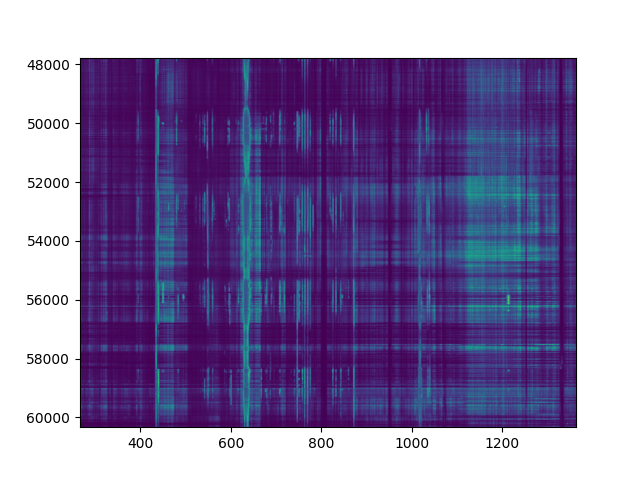

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib


fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

ax.imshow(das_data_all_lp, aspect='auto')

<IPython.core.display.Javascript object>


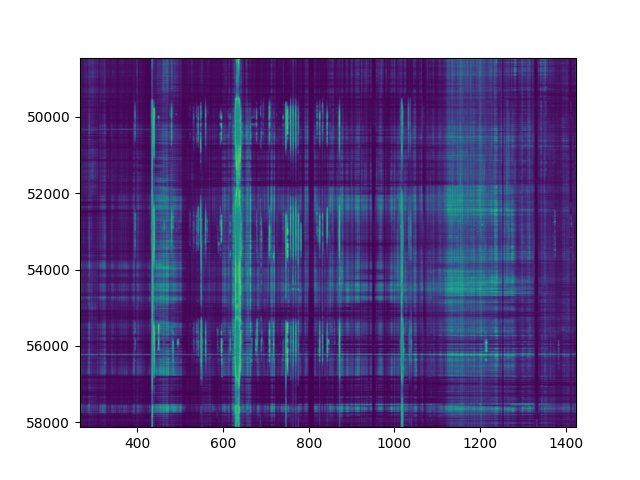

In [4]:
%matplotlib notebook
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

ax.imshow(das_data_all_hp, aspect='auto')

In [ ]:

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 22})

fig, ((ax0,ax1,ax2), (ax3,ax4,ax5), (ax6,ax7,ax8)) = plt.subplots(nrows=3, 
                                 ncols=3, 
                                 sharey=False, 
                                 sharex=False,
                                 figsize=(100,60))
fig.patch.set_facecolor('white')

for ax, hist, title in zip((ax0,ax1,ax2), 
                           ('linear_200_No_Filter','lstm_200_No_Filter','dnn_200_No_Filter'),
                            ('Linear No Filter (200 Timesteps)','LSTM No Filter (200 Timesteps)','DNN No Filter (200 Timesteps)')):
    ax.plot(history[hist].history['loss'], label='Train Loss',linewidth=3)
    ax.plot(history[hist].history['val_loss'], label='Validation Loss',linewidth=3)
    ax.grid(True)
    ax.legend()
    ax.set_title(title,size=50)
    ax.set_ylabel('Loss', size=30)
    ax.set_xlabel('Epoch', size=30)
    ax.set_ylim((0, 1))
    
for ax, hist, title in zip((ax3,ax4,ax5), 
                           ('linear_200_Lowpass','lstm_200_Lowpass','dnn_200_Lowpass'),
                       ('Linear Lowpass (200 Timesteps)','LSTM Lowpass (200 Timesteps)','DNN Lowpass (200 Timesteps)')):
    ax.plot(history[hist].history['loss'], label='Train Loss',linewidth=3)
    ax.plot(history[hist].history['val_loss'], label='Validation Loss',linewidth=3)
    ax.grid(True)
    ax.legend()
    ax.set_title(title,size=50)
    ax.set_ylabel('Loss', size=30)
    ax.set_xlabel('Epoch', size=30)
    ax.set_ylim((0, 1))
    
for ax, hist, title in zip((ax6,ax7,ax8), 
                           ('linear_200_Highpass','lstm_200_Highpass','dnn_200_Highpass'),
                       ('Linear Highpass (200 Timesteps)','LSTM Highpass (200 Timesteps)','DNN Highpass (200 Timesteps)')):
    ax.plot(history[hist].history['loss'], label='Train Loss',linewidth=3)
    ax.plot(history[hist].history['val_loss'], label='Validation Loss',linewidth=3)
    ax.grid(True)
    ax.legend()
    ax.set_title(title,size=50)
    ax.set_ylabel('Loss', size=30)
    ax.set_xlabel('Epoch', size=30)
    ax.set_ylim((0, 1))
    
fig.suptitle('Model Training - No Filter, Lowpass, Highpass Comparisons', fontsize = 80, y = 1)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
import random
import sys
import eli5

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os

filenames = ["/data/fast0/datasets/Rhone_data_continuous_highpass.h5", "/home/jmanos/notebooks/Lowpass_data/Rhone_data_continuous_lowpass.h5"]
filters = ['highpass', 'lowpass']

predictions_dict = {}
real_dict = {}

history = {}
val_performance = {}
performance = {}

seeds = np.arange(1,26, 1)

for seed in seeds:
    for file, filts in zip(filenames, filters):


        SEED = seed
        random.seed(SEED)
        np.random.seed(SEED)
        tf.random.set_seed(SEED)



        ww = 200
        bs = 32

        random.seed(SEED)
        np.random.seed(SEED)
        tf.random.set_seed(SEED)

        input_columns = list(np.arange(0, 2308, 1))


        linear_model, lstm_model, dnn_model, df_all_chan, das_data_all, f  = d2d.import_data(filename = file, input_columns = input_columns)

        da = df_all_chan.to_numpy()

        multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                        input_width=ww,
                                                        label_width=1, 
                                                        shift=0,
                                                        label_columns=['Discharge'],
                                                        input_columns=input_columns,
                                                        shuffle=True,
                                                        batch_size=bs)

        history['lstm_'+filts] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

        val_performance['lstm_'+filts] = lstm_model.evaluate(multi_step_window_shuffled.val)
        performance['lstm_'+filts] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)

        predictions = lstm_model.predict(multi_step_window_shuffled.test).squeeze()
        predictions_real = (predictions * multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean
        predictions_real = [i[-1] for i in predictions_real]
        predictions_dict['pred_dis_'+filts+str(seed)] = predictions_real

        real_dis = []

        for i in multi_step_window_shuffled.test.as_numpy_iterator():
            real_dis.append(i[-1])

        real_dis = np.asarray(real_dis)
        real_dis = real_dis.reshape(real_dis.shape[0] * real_dis.shape[1])

        real_dict['real_dis_'+filts+str(seed)] = (real_dis * multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean


In [ ]:
import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots()

for seed in seeds:
    ax.scatter(real_dict['real_dis_highpass'+str(seed)], predictions_dict['pred_dis_highpass'+str(seed)] - real_dict['real_dis_highpass'+str(seed)], color = 'steelblue')
    ax.scatter(real_dict['real_dis_lowpass'+str(seed)], predictions_dict['pred_dis_lowpass'+str(seed)] - real_dict['real_dis_lowpass'+str(seed)], color = 'orange')
    

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots()

ax.scatter(real_dict['real_dis_highpass'], predictions_dict['real_dis_highpass'] - real_dict['real_dis_highpass'])
ax.scatter(real_dict['real_dis_lowpass'], predictions_dict['real_dis_lowpass'] - real_dict['real_dis_lowpass'])

In [ ]:
highpass_residuals = []
lowpass_residuals = []

for seed in seeds:
    highpass_residuals.append(predictions_dict['pred_dis_highpass'+str(seed)] - real_dict['real_dis_highpass'+str(seed)])
    lowpass_residuals.append(predictions_dict['pred_dis_lowpass'+str(seed)] - real_dict['real_dis_lowpass'+str(seed)])
# mean_high = np.mean(predictions_dict['real_dis_highpass'] - real_dict['real_dis_highpass'])
# mean_low = np.mean(predictions_dict['real_dis_lowpass'] - real_dict['real_dis_lowpass'])

In [ ]:
highpass_residuals = np.asarray(highpass_residuals)
lowpass_residuals = np.asarray(lowpass_residuals)

In [ ]:
highpass_residuals = highpass_residuals.reshape(highpass_residuals.shape[0]*highpass_residuals.shape[1])
lowpass_residuals = lowpass_residuals.reshape(lowpass_residuals.shape[0]*lowpass_residuals.shape[1])

In [ ]:
highpass_mean = np.mean(highpass_residuals)
lowpass_mean = np.mean(lowpass_residuals)

In [ ]:
highpass_mean

In [ ]:
lowpass_mean

In [2]:
import numpy as np
import tensorflow as tf
import random

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os
# os.environ['TF_DETERMINISTIC_OPS'] = '1'
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

linear_model, lstm_model, dnn_model, df_all_chan, das_data_all, f = d2d.import_data(filename = file)

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>


In [21]:
chan_avg = df_all_chan.loc[:,700].rolling(1000).mean()

<IPython.core.display.Javascript object>


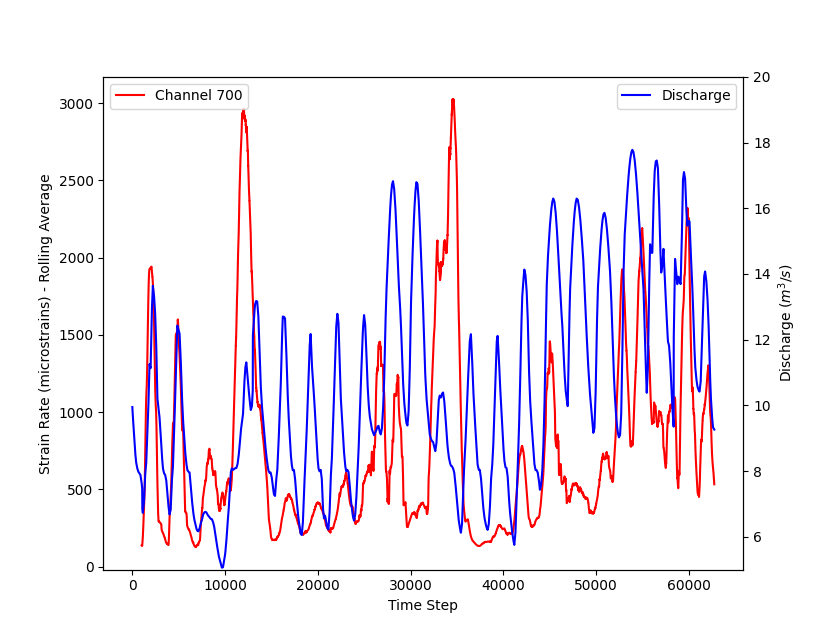

Text(0.5, 0, 'Time Step')

In [41]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib


fig, ax1 = plt.subplots()
fig.patch.set_facecolor('white')
ax2 = ax1.twinx()

ax1.plot(chan_avg, c='red', label='Channel 700')
ax2.plot(df_all_chan.loc[:,'Discharge'], c='blue', label='Discharge')
ax1.set_ylabel('Strain Rate (microstrains) - Rolling Average')
ax2.set_ylabel('Discharge $(m^3/s)$')
ax2.set_ylim([5, 20])
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xlabel('Time Step')


In [3]:
strains_chans = []
discharges = []

for i in np.arange(10,2308,1):
    chan_avg = df_all_chan.loc[:,i].rolling(1000).mean()
    strains_chans.append(chan_avg)
    discharges.append(df_all_chan.loc[:,'Discharge'])
    
strains = np.asarray(strains_chans)
disses = np.asarray(discharges)

strains_format = strains.reshape(strains.shape[0]*strains.shape[1])
discharges_format = disses.reshape(disses.shape[0]*disses.shape[1])






<IPython.core.display.Javascript object>


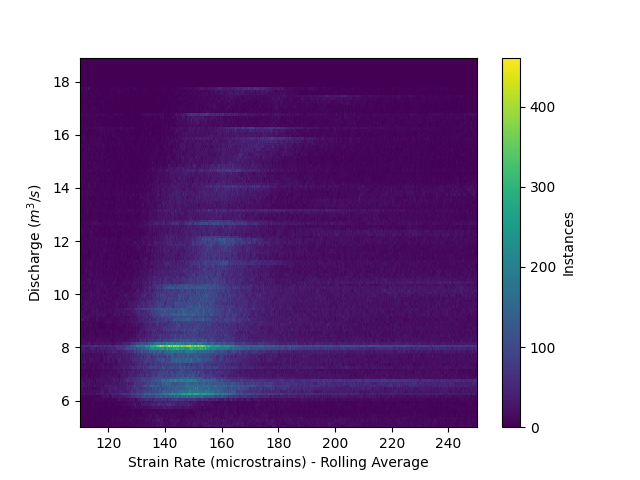

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib


fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

im = ax.hist2d(strains_format, discharges_format, bins=[np.arange(110,250,0.01),np.arange(5,19,0.1)])
ax.set_xlabel('Strain Rate (microstrains) - Rolling Average')
ax.set_ylabel('Discharge $(m^3/s)$')
plt.colorbar(im[3], ax=ax, label='Instances')

plt.show()